#`5430 NLP | SPRING 2021 | ASSIGNMENT | WEEK 4 | CHB2132 `#
---

>**1. Pick a random news article from your Webhose dataset:**
>* Preferably with many entity mentions

In [ ]:
#Installation: !pip install bs4
#Import: from bs4 import BeautifulSoup

In [ ]:
TEXT0 = """Apple removed the headphone jack from the iPhone nearly four years ago in September 2016, and this year it may take those efforts one step further by nixing its wired EarPods from the iPhone 12's packaging, according to the latest predictions from TF International Securities analyst Ming-Chi Kuo. Kuo, who has been accurate about some Apple product predictions in the past, said that Apple may offer promotions or discounts on the AirPods around the holiday season, according to 9to5Mac. The report does not specify whether these expected discounts would pertain to the second-generation regular AirPods, which sell for $159 or $199 with the wireless charging case, or the $249 AirPods Pro. Apple also sells its wired EarPods through its website for $29. Apple did not immediately respond to Business Insider's request for comment. Regardless, such a move will likely result in some backlash from critics and consumers."""

In [ ]:
#retrieving text locations of PERSON entities
T0_ENT0 = TEXT0.find('Ming-Chi Kuo')

#retrieving text locations of ORGANIZATION entities
T0_ENT1 = TEXT0.find('Apple')
T0_ENT2 = TEXT0.find('TF International Securities')

# print(T0_ENT0, T0_ENT1, T0_ENT2)

In [ ]:
TEXT1 = """Apple's removal of the headphone jack with the iPhone 7 was met with controversy, with some tech critics disapproving of the decision and calling it "user-hostile" at the time. Kuo reported in a previous note from December that Apple may be planning to release its first totally wireless iPhone in 2021. That phone would likely be the most expensive one in Apple's 2021 lineup, and Kuo didn't offer any additional details other than that it would offer a completely wireless experience. Phil Schiller, Apple's senior vice president of worldwide marketing, talked about the company's move toward wireless when unveiling the original AirPods in 2016. It makes no sense to tether ourselves with cables to our mobile devices, he said during the company's keynote. AirPods have become an increasingly important part of Apple's product lineup since their 2016 debut. The success of both the Apple Watch and AirPods has made Apple the top maker of wearable devices in the world during the fourth quarter of 2019, according to The International Data Corporation."""

In [ ]:
#retrieving text locations of PERSON entities
T1_ENT0 = TEXT1.find('Kuo')
T1_ENT1 = TEXT1.find('Phil Schiller')

#retrieving text locations of ORGANIZATION entities
T1_ENT2 = TEXT1.find('Apple')
T1_ENT3 = TEXT1.find('The International Data Corporation')

# print(T1_ENT0, T1_ENT1, T1_ENT2, T1_ENT3)

In [ ]:
TEXT = [
  ("""Apple removed the headphone jack from the iPhone nearly four years ago in September 2016, and this year it may take those efforts one step further by nixing its wired EarPods from the iPhone 12's packaging, according to the latest predictions from TF International Securities analyst Ming-Chi Kuo. Kuo, who has been accurate about some Apple product predictions in the past, said that Apple may offer promotions or discounts on the AirPods around the holiday season, according to 9to5Mac. The report does not specify whether these expected discounts would pertain to the second-generation regular AirPods, which sell for $159 or $199 with the wireless charging case, or the $249 AirPods Pro. Apple also sells its wired EarPods through its website for $29. Apple did not immediately respond to Business Insider's request for comment. Regardless, such a move will likely result in some backlash from critics and consumers.""", 
  {"entities": [(284, 296, "PERSON"), (0, 5, "ORG"), (248, 275, "ORG")]}),

  ("""Apple's removal of the headphone jack with the iPhone 7 was met with controversy, with some tech critics disapproving of the decision and calling it "user-hostile" at the time. Kuo reported in a previous note from December that Apple may be planning to release its first totally wireless iPhone in 2021. That phone would likely be the most expensive one in Apple's 2021 lineup, and Kuo didn't offer any additional details other than that it would offer a completely wireless experience. Phil Schiller, Apple's senior vice president of worldwide marketing, talked about the company's move toward wireless when unveiling the original AirPods in 2016. It makes no sense to tether ourselves with cables to our mobile devices, he said during the company's keynote. AirPods have become an increasingly important part of Apple's product lineup since their 2016 debut. The success of both the Apple Watch and AirPods has made Apple the top maker of wearable devices in the world during the fourth quarter of 2019, according to The International Data Corporation.""",
  {"entities": [(177, 180, "PERSON"), (487, 500, "PERSON"), (0, 5, "ORG"), (1019, 1053, "ORG")]}),
]

>**2. Set up an Information Extraction service: SpaCy**

>* Visit SpaCy EntityRecognizer for Python NER calls

>* Write a Python program implementing API calls to:
>  * Extract Company/Organization
>  * Geo entities from the article

In [ ]:
import pandas as pd
import numpy as np

import spacy
import random

from spacy.util import minibatch, compounding
from pathlib import Path

In [ ]:
nlp = spacy.load('en_core_web_sm')

SUBJECTS = ["nsubj", "nsubjpass", "csubj", "csubjpass", "agent", "expl"]
OBJECTS = ["dobj", "dative", "attr", "oprd"]

In [ ]:
def call_spacy(data):
  
  ARTICLE_TEXT = data

  # create the built-in pipeline components and add them to the pipeline
  # nlp.create_pipe works for built-ins that are registered with spaCy
  if "ner" not in nlp.pipe_names:
      ner = nlp.create_pipe("ner")
      nlp.add_pipe(ner, last = True)

  # otherwise, get it so we can add labels
  else:
      ner = nlp.get_pipe("ner")

  # add labels
  for _, annotations in ARTICLE_TEXT:
      for ent in annotations.get("entities"):
          ner.add_label(ent[2])

  return nlp

In [ ]:
# test the function
for text, _ in TEXT:
  doc = nlp(text)
  print("Entities", [(ent.text, ent.label_) for ent in doc.ents])
  print("Tokens", [(t.text, t.ent_type_, t.ent_iob) for t in doc])
  print("\n")

Entities [('Apple', 'ORG'), ('iPhone', 'ORG'), ('nearly four years ago', 'DATE'), ('September 2016', 'DATE'), ('this year', 'DATE'), ('one', 'CARDINAL'), ('EarPods', 'ORG'), ('iPhone', 'ORG'), ('TF International Securities', 'ORG'), ('Ming-Chi Kuo', 'PERSON'), ('Kuo', 'PERSON'), ('Apple', 'ORG'), ('Apple', 'ORG'), ('AirPods', 'ORG'), ('the holiday season', 'DATE'), ('9to5Mac', 'CARDINAL'), ('second', 'ORDINAL'), ('AirPods', 'PRODUCT'), ('$159 or $199', 'MONEY'), ('249', 'MONEY'), ('AirPods Pro', 'ORG'), ('Apple', 'ORG'), ('EarPods', 'ORG'), ('29', 'MONEY'), ('Apple', 'ORG'), ("Business Insider's", 'ORG')]
Tokens [('Apple', 'ORG', 3), ('removed', '', 2), ('the', '', 2), ('headphone', '', 2), ('jack', '', 2), ('from', '', 2), ('the', '', 2), ('iPhone', 'ORG', 3), ('nearly', 'DATE', 3), ('four', 'DATE', 1), ('years', 'DATE', 1), ('ago', 'DATE', 1), ('in', '', 2), ('September', 'DATE', 3), ('2016', 'DATE', 1), (',', '', 2), ('and', '', 2), ('this', 'DATE', 3), ('year', 'DATE', 1), ('it', '

In [ ]:
newsCy = call_spacy(TEXT)

#Test your text
input_text = input("Enter your testing text: ")

doc = newsCy(input_text)

for ent in doc.ents:
    print(ent.text, ent.start_char, ent.end_char, ent.label_)

Enter your testing text: Apple's removal of the headphone jack with the iPhone 7 was met with controversy, with some tech critics disapproving of the decision and calling it "user-hostile" at the time.
Apple 0 5 ORG
the iPhone 7 43 55 LAW


> **3. Use the SpaCy NER notebook to:**

> * update TRAIN_DATA with annotations of entities:
>  * (PERSON, LOCATION, or ORGANIZATION) 
>  * from each sentence in the article

> * run spaCy_NER function to generate trained_nlp model

> * test entity recognition with trained_nlp:
    * use on a second article
    * print results to output

In [ ]:
TRAIN_DATA = [
              ('''Apple's removal of the headphone jack with the iPhone 7 was met with controversy, with some tech critics disapproving of the decision and calling it "user-hostile" at the time.''',
              {'entities': [(0, 5, 'ORG')]}),
              ('''Kuo reported in a previous note from December that Apple may be planning to release its first totally wireless iPhone in 2021.''',
              {'entities': [(0, 3, 'PERSON'), (51, 56, 'ORG')]}),
              ('''That phone would likely be the most expensive one in Apple's 2021 lineup, and Kuo didn't offer any additional details other than that it would offer a completely wireless experience.''',
              {'entities': [(53, 58, 'ORG'), (78, 81, 'PERSON')]}),
              ('''Phil Schiller, Apple's senior vice president of worldwide marketing, talked about the company's move toward wireless when unveiling the original AirPods in 2016.''',
              {'entities': [(0, 15, 'PERSON'), (15, 20, 'ORG')]}),
              ('''AirPods have become an increasingly important part of Apple's product lineup since their 2016 debut.''',
              {'entities': [(54, 59, 'ORG')]}),
              ('''The success of both the Apple Watch and AirPods has made Apple the top maker of wearable devices in the world during the fourth quarter of 2019, according to The International Data Corporation.''',
              {'entities': [(24, 29, 'ORG'), (158, 192, 'ORG')]})]

### Train NER

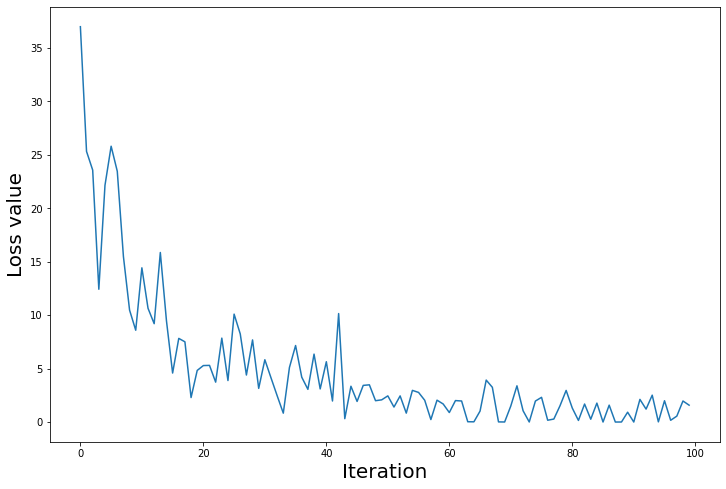

In [ ]:
import matplotlib.pyplot as plt

def plot_loss_history(loss_history):
    f, ax = plt.subplots(1, 1, figsize=(12, 8)) # set the size of figures for plots
    plt.plot(loss_history)
    plt.xlabel('Iteration').set_fontsize(20)
    plt.ylabel('Loss value').set_fontsize(20)
    plt.show()
    return

n_iter=100
loss_history = []
# get names of other pipes to disable them during training
other_pipes = [pipe for pipe in nlp.pipe_names if pipe != "ner"]
with nlp.disable_pipes(*other_pipes):  # only train NER
    # reset and initialize the weights randomly – but only if we're
    # training a new model
    #if model is None:
    nlp.begin_training()
    for itn in range(n_iter):
        random.shuffle(TRAIN_DATA)
        losses = {}
        # batch up the examples using spaCy's minibatch
        batches = minibatch(TRAIN_DATA, size=compounding(4.0, 32.0, 1.001))
        for batch in batches:
            texts, annotations = zip(*batch)
            nlp.update(
                texts,  # batch of texts
                annotations,  # batch of annotations
                drop=0.5,  # dropout - make it harder to memorise data
                losses=losses,
            )
        loss_history.append(losses['ner'])

# the loss should trend down
plot_loss_history(loss_history)

### Test the trained model

Starting iteration 0
Starting iteration 5
Starting iteration 10
Starting iteration 15


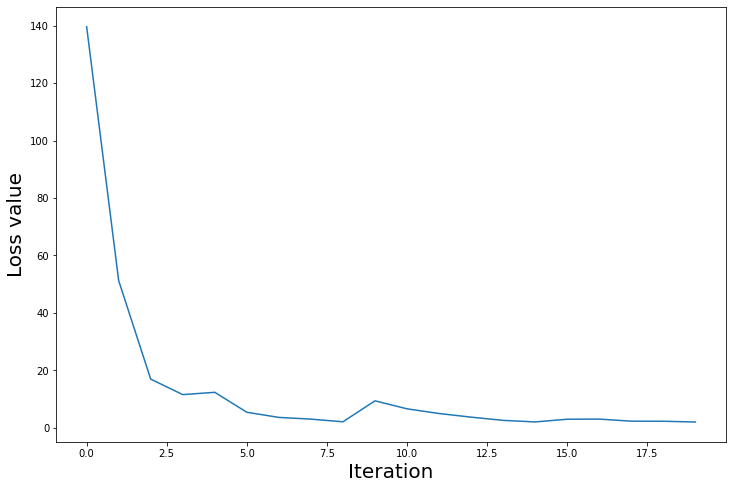

Enter your testing text: Kuo reported in a previous note from December that Apple may be planning to release its first totally wireless iPhone in 2021.
Kuo 0 3 PERSON
Apple 51 56 ORG


In [ ]:
def train_spacy(data,iterations):
    TRAIN_DATA = data
    nlp = spacy.blank('en')  # create blank Language class
    # create the built-in pipeline components and add them to the pipeline
    # nlp.create_pipe works for built-ins that are registered with spaCy
    if 'ner' not in nlp.pipe_names:
        ner = nlp.create_pipe('ner')
        nlp.add_pipe(ner, last=True)

    # add labels
    for _, annotations in TRAIN_DATA:
         for ent in annotations.get('entities'):
            ner.add_label(ent[2])

    # get names of other pipes to disable them during training
    other_pipes = [pipe for pipe in nlp.pipe_names if pipe != 'ner']
    with nlp.disable_pipes(*other_pipes):  # only train NER
        optimizer = nlp.begin_training()
        loss_history = []
        for itn in range(iterations):
            if not itn % 5:
                print("Starting iteration " + str(itn))
            random.shuffle(TRAIN_DATA)
            losses = {}
            for text, annotations in TRAIN_DATA:
                nlp.update(
                    [text],  # batch of texts
                    [annotations],  # batch of annotations
                    drop=0.2,  # dropout - make it harder to memorise data
                    sgd=optimizer,  # callable to update weights
                    losses=losses)
            loss_history.append(losses['ner'])
    plot_loss_history(loss_history)
    return nlp

prdnlp = train_spacy(TRAIN_DATA, 20)


#Test your text
test_text = input("Enter your testing text: ")
doc = prdnlp(test_text)
for ent in doc.ents:
    print(ent.text, ent.start_char, ent.end_char, ent.label_)

In [ ]:
# test the trained model

for text, _ in TRAIN_DATA:
  doc = nlp(text)
  print("Entities", [(ent.text, ent.label_) for ent in doc.ents])
  print("Tokens", [(t.text, t.ent_type_, t.ent_iob) for t in doc])
  print("\n")

Entities [('Apple', 'ORG')]
Tokens [('Apple', 'ORG', 3), ("'s", '', 2), ('removal', '', 2), ('of', '', 2), ('the', '', 2), ('headphone', '', 2), ('jack', '', 2), ('with', '', 2), ('the', '', 2), ('iPhone', '', 2), ('7', '', 2), ('was', '', 2), ('met', '', 2), ('with', '', 2), ('controversy', '', 2), (',', '', 2), ('with', '', 2), ('some', '', 2), ('tech', '', 2), ('critics', '', 2), ('disapproving', '', 2), ('of', '', 2), ('the', '', 2), ('decision', '', 2), ('and', '', 2), ('calling', '', 2), ('it', '', 2), ('"', '', 2), ('user', '', 2), ('-', '', 2), ('hostile', '', 2), ('"', '', 2), ('at', '', 2), ('the', '', 2), ('time', '', 2), ('.', '', 2)]


Entities [('Apple', 'ORG'), ('Kuo', 'PERSON')]
Tokens [('That', '', 2), ('phone', '', 2), ('would', '', 2), ('likely', '', 2), ('be', '', 2), ('the', '', 2), ('most', '', 2), ('expensive', '', 2), ('one', '', 2), ('in', '', 2), ('Apple', 'ORG', 3), ("'s", '', 2), ('2021', '', 2), ('lineup', '', 2), (',', '', 2), ('and', '', 2), ('Kuo', 'PERS